In [1]:
from matplotlib import pyplot as plt
import numpy as np
import classifier_utils
from classifier_utils import cnn_model, preprocess_img, get_class
%matplotlib inline
import glob
import os
from skimage import io
from skimage import transform
import keras
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.models import Sequential, Model
from keras.datasets import cifar10

import vgg16


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print y_train[1]

[9]


### Array details (dimension, type):

In [ ]:
print x_train.shape

In [ ]:
type(x_train)

In [ ]:
print x_train

### Image resizing. Vgg16 takes minimum size of 48x48

In [ ]:
x_train_vgg = np.zeros((50000,64,64,3))

for i in range(50000):
    x_train_vgg[i] = transform.resize(x_train[i], (64, 64), order=0)

In [5]:
#1st model
IMG_SIZE = 32
#2nd model
#IMG_SIZE = 64 
NUM_CLASSES = 10

### Reducing amount of pictures

In [7]:
#1st model
x_train = x_train[0:5000]
y_train = y_train[0:5000]

In [ ]:
#2nd model
x_train_vgg = x_train_vgg[0:5000]
y_train_vgg = y_train[0:5000]

In [8]:
print x_train.shape

(5000, 32, 32, 3)


In [9]:
x_train = x_train.astype('float32')/255 # now values are between 0 and 1

### Why already calculated values? By default on .resize

In [10]:
print x_train

[[[[ 0.23137255  0.24313726  0.24705882]
   [ 0.16862746  0.18039216  0.17647059]
   [ 0.19607843  0.1882353   0.16862746]
   ..., 
   [ 0.61960787  0.51764709  0.42352942]
   [ 0.59607846  0.49019608  0.40000001]
   [ 0.58039218  0.48627451  0.40392157]]

  [[ 0.0627451   0.07843138  0.07843138]
   [ 0.          0.          0.        ]
   [ 0.07058824  0.03137255  0.        ]
   ..., 
   [ 0.48235294  0.34509805  0.21568628]
   [ 0.46666667  0.32549021  0.19607843]
   [ 0.47843137  0.34117648  0.22352941]]

  [[ 0.09803922  0.09411765  0.08235294]
   [ 0.0627451   0.02745098  0.        ]
   [ 0.19215687  0.10588235  0.03137255]
   ..., 
   [ 0.4627451   0.32941177  0.19607843]
   [ 0.47058824  0.32941177  0.19607843]
   [ 0.42745098  0.28627452  0.16470589]]

  ..., 
  [[ 0.81568629  0.66666669  0.3764706 ]
   [ 0.78823531  0.60000002  0.13333334]
   [ 0.7764706   0.63137257  0.10196079]
   ..., 
   [ 0.627451    0.52156866  0.27450982]
   [ 0.21960784  0.12156863  0.02745098]
   [ 0.

### Examples from training set (64x64 and 32x32)

In [ ]:
single_image = x_train_vgg[300:301]
plt.imshow(single_image[0])         

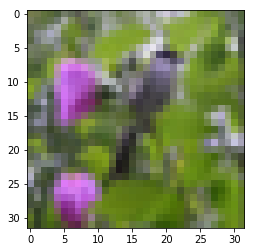

In [11]:
single_image = x_train[300:301]
plt.imshow(single_image[0])   

### Zdjecie warstwy: include_top=False

In [12]:
first_model = cnn_model(IMG_SIZE,NUM_CLASSES)

In [ ]:
#second_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(64,64,3), pooling=max)

### Choose model (remember to set NUM_CLASSES)

In [13]:
model = first_model
#model = second_model

In [ ]:
model.layers

### Alternative way to add last layer and activation 

In [ ]:
#model.add(Dense(NUM_CLASSES, activation='softmax')) .add doesn't work for VGG16

last = model.output

x = Flatten()(last)
preds = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(model.input, preds)

In [ ]:
model.layers

In [ ]:
model.summary()

In [14]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#1st model
model.fit(x_train, y_train, batch_size=128, epochs=10)
#2nd model
#model.fit(x_train_vgg, y_train_vgg, batch_size=128, epochs=2)

Epoch 1/10
5000/5000 [==============================] - 11s - loss: 1.0851 - acc: 0.6012    
Epoch 2/10
5000/5000 [==============================] - 11s - loss: 1.0459 - acc: 0.6222    
Epoch 3/10
5000/5000 [==============================] - 12s - loss: 0.9742 - acc: 0.6458    
Epoch 4/10
5000/5000 [==============================] - 12s - loss: 0.9551 - acc: 0.6512    
Epoch 5/10
5000/5000 [==============================] - 11s - loss: 0.9328 - acc: 0.6668    
Epoch 6/10
5000/5000 [==============================] - 14s - loss: 0.8943 - acc: 0.6778    
Epoch 7/10
5000/5000 [==============================] - 12s - loss: 0.8839 - acc: 0.6786    
Epoch 8/10
5000/5000 [==============================] - 12s - loss: 0.8265 - acc: 0.7002    
Epoch 9/10
5000/5000 [==============================] - 12s - loss: 0.7843 - acc: 0.7168    
Epoch 10/10
5000/5000 [==============================] - 12s - loss: 0.7385 - acc: 0.7358    


In [ ]:
model.evaluate(x_test, y_test)